### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("loan_default.csv")  

# Display first 5 rows
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Basic Information About Dataset

In [3]:
# Shape of dataset
print("Rows and Columns:", df.shape)

Rows and Columns: (255347, 18)


In [4]:
# Column names
print(df.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [5]:
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

### Statistical Summary

In [6]:
# Statistical summary of numerical columns
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


- Count: All columns have 255,347 records, meaning no missing values in these numeric columns.

- Mean & Median: The average age is ~43 years, average income ~82,500, and average loan amount ~127,500. Median values are close to the mean, indicating relatively symmetric distributions for most features.

- Spread: Standard deviations indicate variability—for example, income varies widely (~38,963) and loan amounts vary a lot (~70,841).

- Min/Max & Quartiles: Age ranges from 18 to 69, income from 15,000 to 150,000, and credit scores from 300 to 849. Quartiles show how values are distributed, e.g., 25% of customers have loans ≤66,156, and 75% ≤188,985.

- Target Variable (Default): The target is binary with ~11.6% of customers defaulting, showing an imbalanced dataset.

### Checking Missing Values

In [7]:
df.isnull().sum()/len(df)*100

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64

## Exploratory Data Analysis(EDA):

### Target Variable Distribution

Target column = Default

In [8]:
# Distribution of target variable
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

We can conclude that there are 29653 loans ~11.6% of customers defaulting, showing an imbalanced dataset.

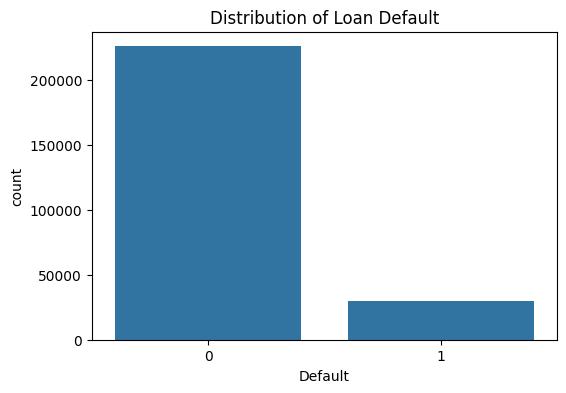

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=df)
plt.title("Distribution of Loan Default")
plt.show()

### Numerical Feature Distribution

<Figure size 1200x800 with 0 Axes>

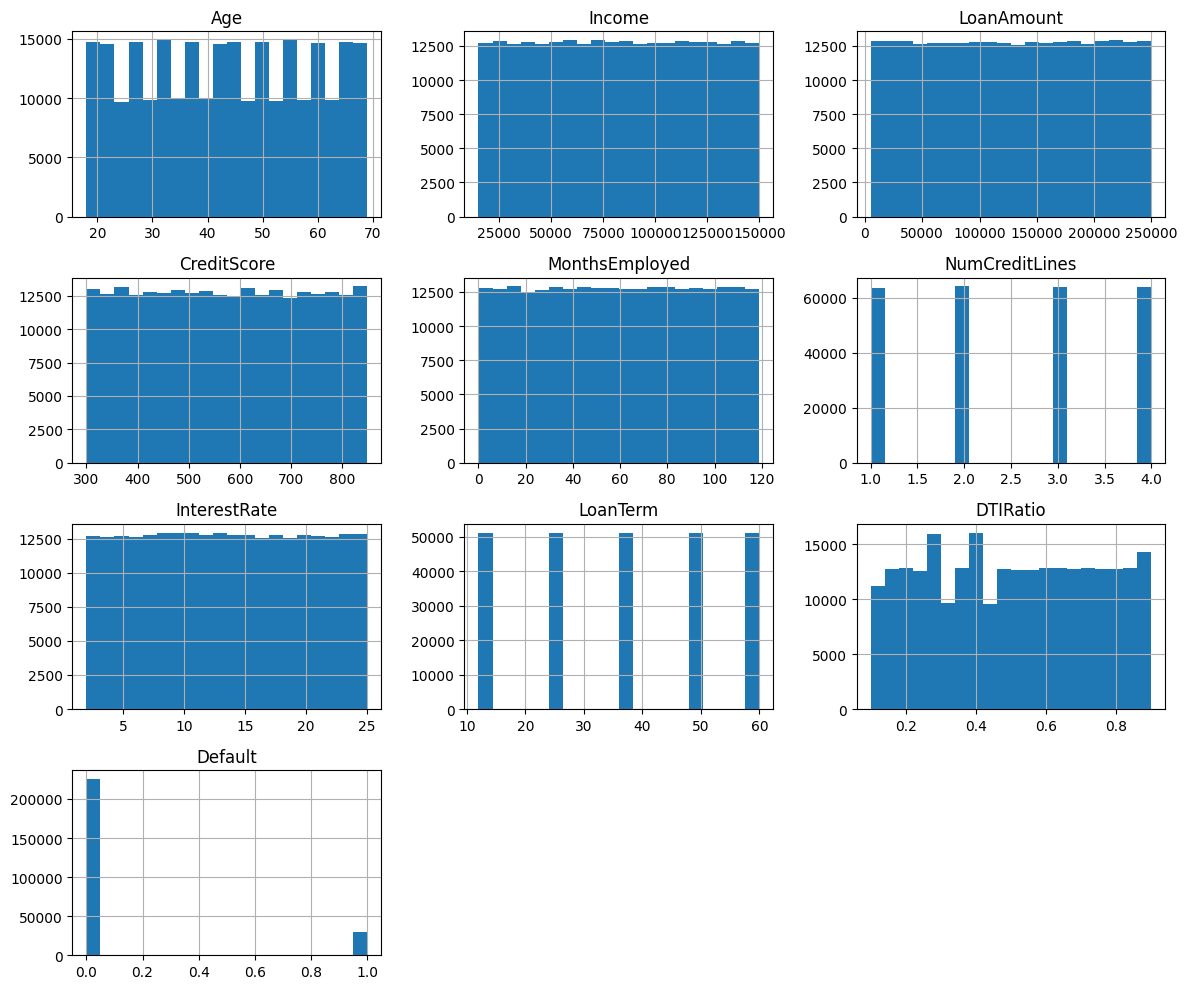

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12,8))
df[num_cols].hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

The numerical features in the dataset show diverse and well-distributed values with no extreme skewness. However, the target variable is highly imbalanced, which indicates that loan default is a rare event. This highlights the importance of applying appropriate techniques during model training to handle class imbalance and improve predictive performance.

### Correlation Analysis

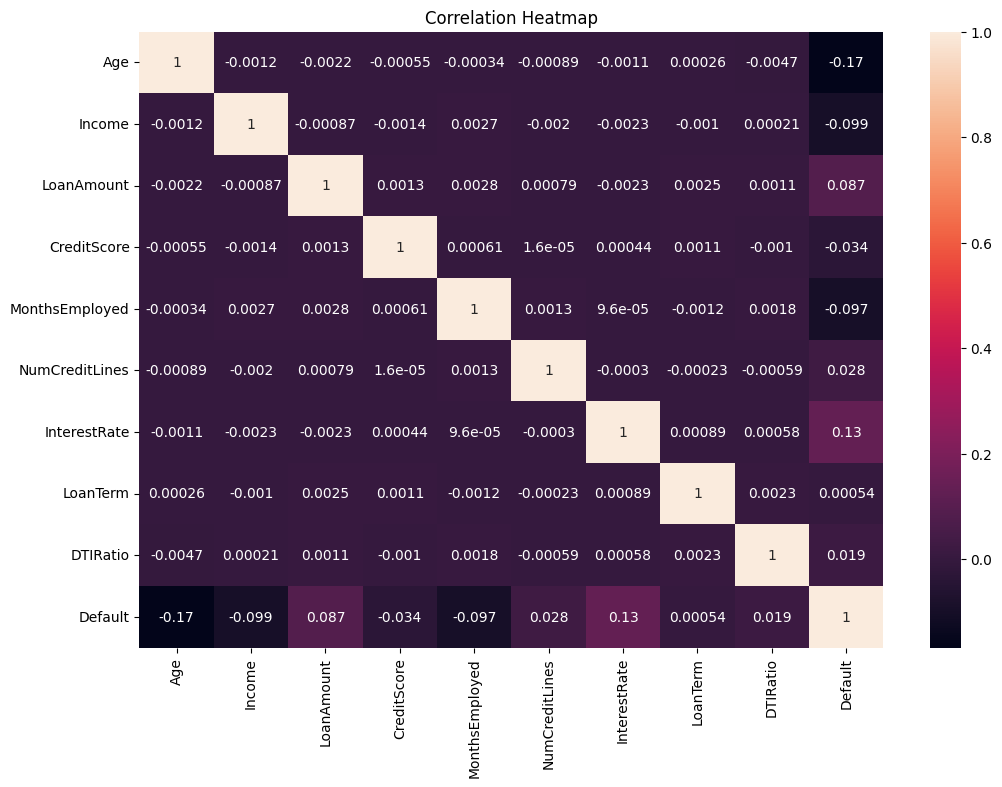

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows that most features have weak to moderate relationships with the target variable (Default). Age, income, and months employed have a negative correlation, indicating that older, higher-income, and more stable borrowers are less likely to default. In contrast, loan amount and interest rate show a positive correlation, suggesting that larger loans and higher interest rates slightly increase default risk. Overall, no single feature strongly predicts default, indicating that loan default is influenced by multiple factors.

### Categorical Feature Analysis

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


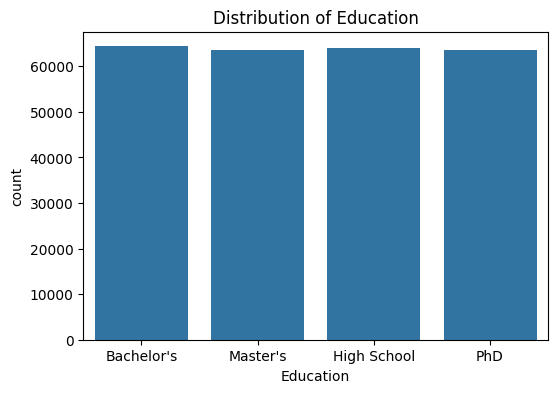

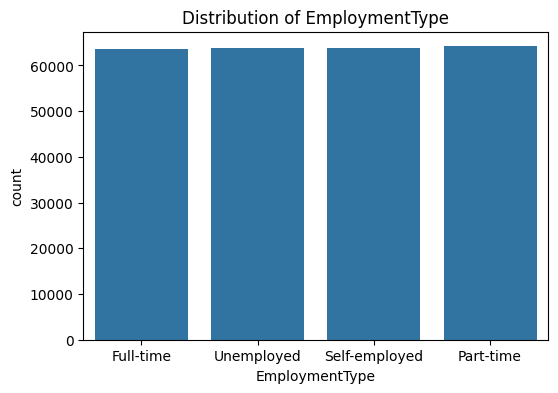

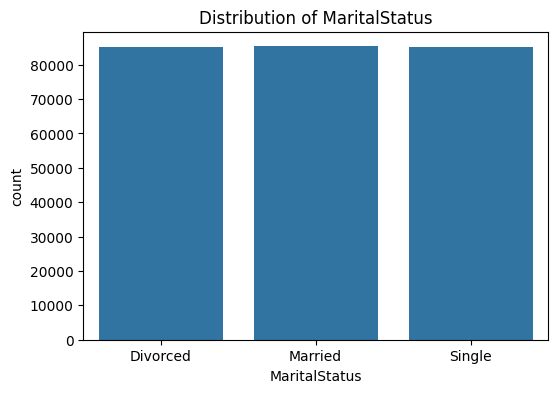

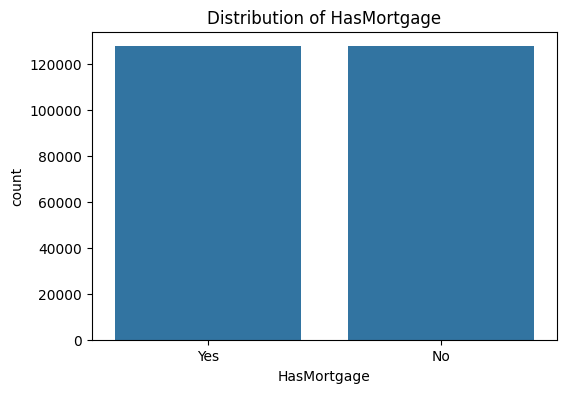

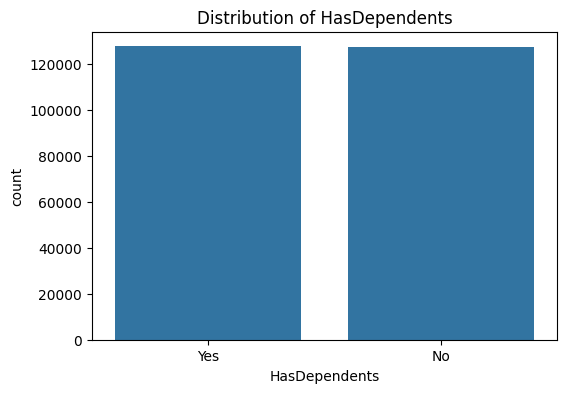

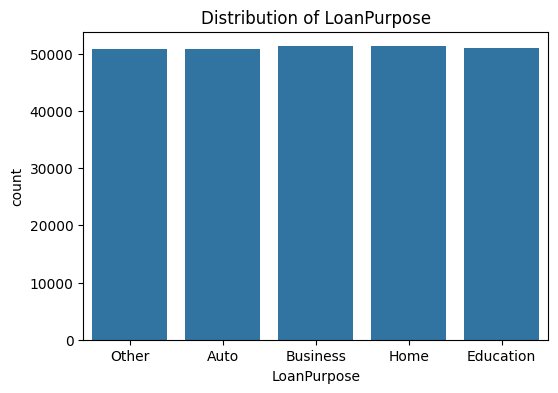

In [13]:
# List of necessary categorical columns 
cat_cols2 = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose']

for col in cat_cols2:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


The distribution analysis of categorical columns such as Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, and LoanPurpose shows that most categories are almost evenly distributed in the dataset, indicating a balanced representation of different customer groups. This suggests that the dataset does not suffer from significant categorical bias and provides diverse information for building a robust machine learning model.

## Numerical Features vs Default

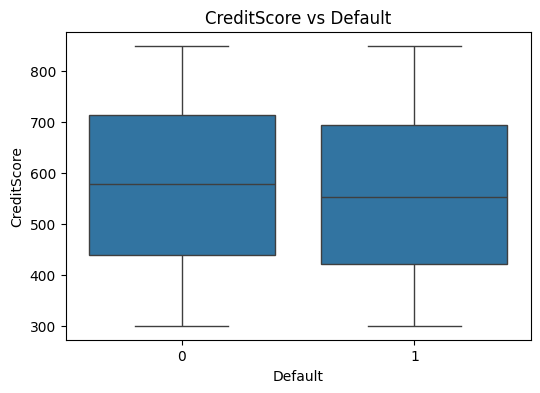

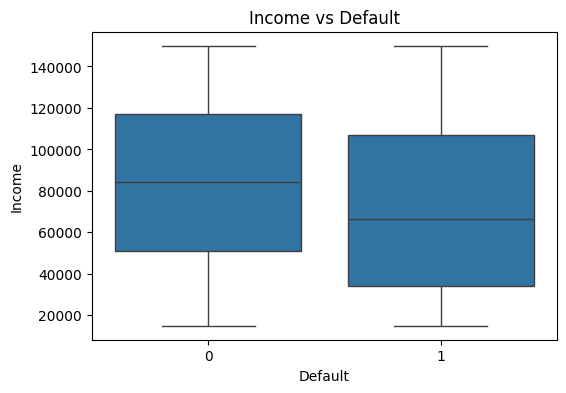

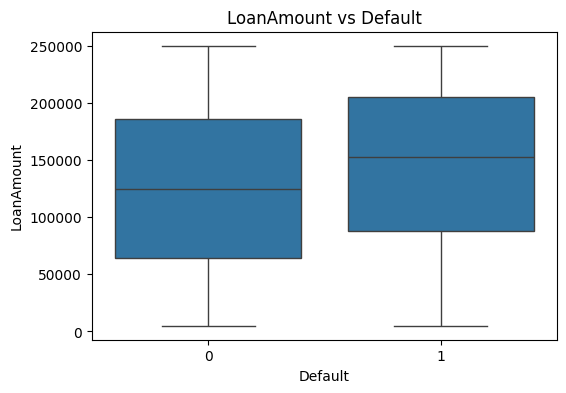

In [14]:
num_cols = ['CreditScore', 'Income', 'LoanAmount']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Default', y=col, data=df)
    plt.title(f"{col} vs Default")
    plt.show()

## Categorical Features vs Default

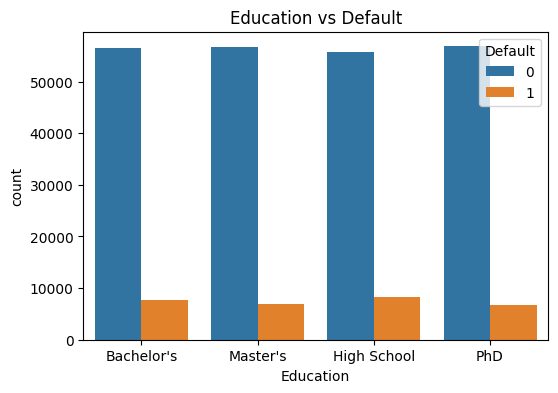

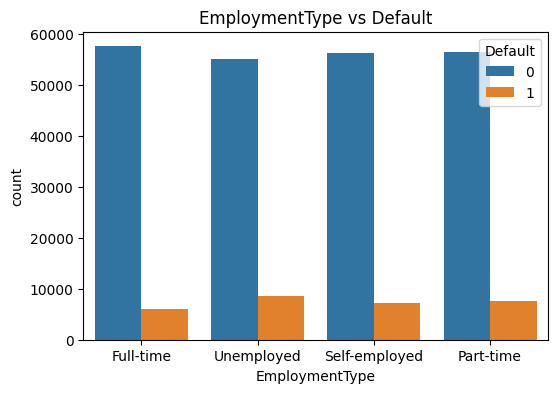

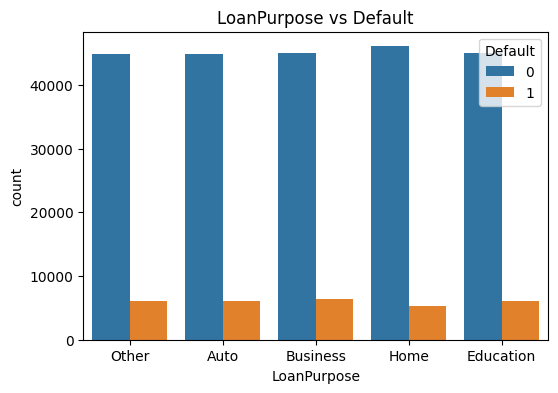

In [15]:
cat_cols3 = ['Education', 'EmploymentType', 'LoanPurpose']

for col in cat_cols3:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Default', data=df)
    plt.title(f"{col} vs Default")
    plt.show()


# MODEL BUILDING

In [16]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Import required libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

## Step 1: Preparing the dataset

In [18]:
# Drop LoanID (irrelevant for modeling)

df = df.drop('LoanID', axis=1)

In [19]:
# Checking Unique Values and Value Count of Categorical columns:

cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in cat_cols:
    print(f"\nValue counts for {col}")
    print(df[col].value_counts())


Value counts for Education
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

Value counts for EmploymentType
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

Value counts for MaritalStatus
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

Value counts for HasMortgage
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

Value counts for HasDependents
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

Value counts for LoanPurpose
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

Value counts for HasCoSigner
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


#### Label Encoding of Binary Columns 'HasMortgage', 'HasDependents', and, 'HasCoSigner'

In [20]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

#### ONE-HOT-ENCODING of Remaining Categorical Columns

In [21]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [22]:
df.sample(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
45007,43,128812,182465,745,26,3,6.69,36,0.28,1,...,False,False,False,False,False,False,False,False,True,False
247806,20,57530,17484,345,71,1,9.80,24,0.22,1,...,True,True,False,False,False,False,True,False,False,False
36521,35,74253,204105,633,51,3,21.41,48,0.85,1,...,True,True,False,False,False,True,False,False,True,False
175006,29,96349,109998,598,107,1,22.98,36,0.47,0,...,False,False,False,True,False,True,False,False,True,False
241974,63,139248,208691,408,86,2,4.98,36,0.87,0,...,True,True,False,False,True,False,False,False,True,False
150358,67,112185,187892,350,117,2,16.78,12,0.27,1,...,False,False,False,True,False,False,False,False,True,False
240285,37,148376,76556,677,100,3,12.60,36,0.30,0,...,False,False,False,False,False,True,False,True,False,False
87071,61,49396,199604,837,70,4,2.35,24,0.29,0,...,False,True,False,False,False,True,False,False,True,False
133428,51,147421,17684,618,78,4,4.00,36,0.30,0,...,True,True,False,False,False,False,False,False,False,True
158211,66,47204,205570,667,116,4,7.97,60,0.36,1,...,False,False,False,True,False,True,False,False,True,False


## Step 2: Train Test Split

#### Separate Features and Target

In [23]:
X = df.drop('Default', axis=1)
y = df['Default']

#### Train Test Split (BEFORE Scaling & SMOTE)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

## Step 3: Scale numerical features

In [35]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

scaler = StandardScaler()

X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

## Step 4: Handling class imbalance using SMOTE

In [36]:
# APPLYING SMOTE ONLY ON TRAINING DATA

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE Train Shape:", X_train.shape)
print("After SMOTE Target Counts:\n", y_train.value_counts())

After SMOTE Train Shape: (361110, 24)
After SMOTE Target Counts:
 Default
0    180555
1    180555
Name: count, dtype: int64


## Step 5: Define Model Evaluation Function

In [45]:
def model_performance(model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Cross-validation on training data using f1-score (better for imbalanced data)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    cv_score = np.mean(cv_scores)
    
    print("Cross Validation F1 Score:", round(cv_score,3))
    
    print("\nTrain Data")
    print(classification_report(y_train, y_train_pred))
    print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred),3))
    
    print("\nTest Data")
    print(classification_report(y_test, y_test_pred))
    print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred),3))

Cross-validation was applied on the training data to evaluate model stability across multiple splits. Since this is a classification problem, stratified folds were used to preserve the distribution of the target variable in each fold.

## Step 6: Import Required Classification Models

The target variable in my dataset represents whether a customer defaults on a loan or not. Since the output is categorical rather than continuous, this is a binary classification problem.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Step 7: Initialize Models

In [47]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', n_jobs=-1, random_state=42)
bag = BaggingClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
xgb = XGBClassifier()

## Step 8: Train and Evaluate Models

## 1) LOGISTIC REGRESSION

In [48]:
model_performance(lr)

Cross Validation F1 Score: 0.75

Train Data
              precision    recall  f1-score   support

           0       0.76      0.74      0.75    180555
           1       0.75      0.76      0.75    180555

    accuracy                           0.75    361110
   macro avg       0.75      0.75      0.75    361110
weighted avg       0.75      0.75      0.75    361110

Train Accuracy: 0.752

Test Data
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     45139
           1       0.22      0.54      0.31      5931

    accuracy                           0.72     51070
   macro avg       0.57      0.64      0.57     51070
weighted avg       0.84      0.72      0.76     51070

Test Accuracy: 0.719


Logistic Regression achieved about 75% test accuracy with stable cross-validation results.
It performed well in identifying non-defaulters but struggled to correctly predict defaulters, as indicated by the low precision and F1-score for class 1.
This suggests that the relationship between the features and default risk may be non-linear, making Logistic Regression less effective than more complex models.

## 2) DECISION TREE

In [49]:
model_performance(dt)

Cross Validation F1 Score: 0.809

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    180555
           1       1.00      1.00      1.00    180555

    accuracy                           1.00    361110
   macro avg       1.00      1.00      1.00    361110
weighted avg       1.00      1.00      1.00    361110

Train Accuracy: 1.0

Test Data
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     45139
           1       0.18      0.35      0.24      5931

    accuracy                           0.74     51070
   macro avg       0.54      0.57      0.54     51070
weighted avg       0.82      0.74      0.77     51070

Test Accuracy: 0.743


The Decision Tree model achieved about 74% test accuracy with a cross-validation score of around 81%.
It showed perfect performance on the training data, indicating that the model memorized the training patterns, which suggests overfitting.
Although its test accuracy is slightly higher than Logistic Regression, it struggled to correctly identify defaulters, as seen from the low precision and F1-score for class 1.
This indicates that while Decision Trees can capture complex patterns, they may generalize poorly without proper regularization or pruning.

## 3) RANDOM FOREST

In [50]:
model_performance(rf)

Cross Validation F1 Score: 0.914

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    180555
           1       1.00      1.00      1.00    180555

    accuracy                           1.00    361110
   macro avg       1.00      1.00      1.00    361110
weighted avg       1.00      1.00      1.00    361110

Train Accuracy: 1.0

Test Data
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     45139
           1       0.31      0.28      0.29      5931

    accuracy                           0.84     51070
   macro avg       0.61      0.60      0.60     51070
weighted avg       0.84      0.84      0.84     51070

Test Accuracy: 0.845


Random Forest achieved about 85% test accuracy with a strong cross-validation F1 score.
While it improved prediction for both classes, recall for defaulters remains low, showing some limitations with minority class prediction.
The ensemble approach reduced overfitting and provided more stable predictions than a single Decision Tree.

## 4) BAGGING CLASSIFIER

In [51]:
model_performance(bag)

Cross Validation F1 Score: 0.875

Train Data
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    180555
           1       1.00      0.99      1.00    180555

    accuracy                           1.00    361110
   macro avg       1.00      1.00      1.00    361110
weighted avg       1.00      1.00      1.00    361110

Train Accuracy: 0.996

Test Data
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     45139
           1       0.28      0.25      0.27      5931

    accuracy                           0.84     51070
   macro avg       0.59      0.58      0.59     51070
weighted avg       0.83      0.84      0.83     51070

Test Accuracy: 0.838


Bagging Classifier achieved about 84% test accuracy and strong cross-validation performance.
It reduced variance by combining multiple trees, improving stability over a single tree, but the recall for defaulters was still limited.
Bagging demonstrates the benefit of averaging multiple models, though it cannot fully solve class imbalance issues.

## 5) ADABOOST

In [53]:
model_performance(ada)

Cross Validation F1 Score: 0.762

Train Data
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    180555
           1       0.76      0.76      0.76    180555

    accuracy                           0.76    361110
   macro avg       0.76      0.76      0.76    361110
weighted avg       0.76      0.76      0.76    361110

Train Accuracy: 0.762

Test Data
              precision    recall  f1-score   support

           0       0.93      0.76      0.83     45139
           1       0.23      0.54      0.32      5931

    accuracy                           0.73     51070
   macro avg       0.58      0.65      0.58     51070
weighted avg       0.85      0.73      0.77     51070

Test Accuracy: 0.734


AdaBoost achieved about 73% test accuracy with moderate cross-validation results.
It focused on harder-to-predict samples, slightly improving defaulter detection compared to Logistic Regression, but performance remains moderate.
The sequential learning approach improves attention on minority class samples, yet overall recall for defaulters is still low.

## 6) GRADIENT BOOSTING

In [52]:
model_performance(gb)

Cross Validation F1 Score: 0.784

Train Data
              precision    recall  f1-score   support

           0       0.80      0.79      0.79    180555
           1       0.79      0.80      0.80    180555

    accuracy                           0.80    361110
   macro avg       0.80      0.80      0.80    361110
weighted avg       0.80      0.80      0.80    361110

Train Accuracy: 0.796

Test Data
              precision    recall  f1-score   support

           0       0.93      0.79      0.85     45139
           1       0.25      0.54      0.34      5931

    accuracy                           0.76     51070
   macro avg       0.59      0.66      0.60     51070
weighted avg       0.85      0.76      0.79     51070

Test Accuracy: 0.759


Gradient Boosting achieved about 76% test accuracy with consistent cross-validation results.
It captured patterns missed by simpler models, slightly improving defaulter detection.
This sequential ensemble method handles complex feature interactions better, though minority class performance still lags.

## 7) XGBOOST

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
model_performance(xgb)

Cross Validation Accuracy: 0.899

Train Data
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    180555
           1       0.97      0.85      0.91    180555

    accuracy                           0.91    361110
   macro avg       0.92      0.91      0.91    361110
weighted avg       0.92      0.91      0.91    361110

Train Accuracy: 0.913

Test Data
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     45139
           1       0.40      0.17      0.24      5931

    accuracy                           0.87     51070
   macro avg       0.65      0.57      0.59     51070
weighted avg       0.84      0.87      0.85     51070

Test Accuracy: 0.874


XGBoost achieved about 87% test accuracy with high cross-validation accuracy.
It performed best among all models for identifying defaulters, though recall for class 1 remains lower than for non-defaulters.
XGBoost effectively handles complex relationships and class imbalance, making it the most robust model for predicting default risk in this dataset.